In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets,linear_model,metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA

In [54]:
data=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/archive/train.csv")
data1=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/archive/test.csv")

In [57]:
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [8]:
data.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [9]:
data.Product_Category_2.fillna(data.Product_Category_2.fillna("others"),inplace=True)

In [10]:
#data.Product_Category_3.fillna(data.Product_Category_3.mode().max(),inplace=True)

In [11]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.000000
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [12]:
x=data.iloc[0:,2:10]
y=data.Purchase

In [13]:
x.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,A,2,0,3,others
1,F,0-17,10,A,2,0,1,6.0
2,F,0-17,10,A,2,0,12,others
3,F,0-17,10,A,2,0,12,14.0
4,M,55+,16,C,4+,0,8,others


In [14]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)
 
# trainx, testx, trainy, testy = train_test_split(y,y,test_size=0.2)

In [15]:
dummy=pd.get_dummies(x)
dummy=pd.get_dummies(dummy,columns=["Occupation","Product_Category_1"])


In [16]:
dummy

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
550064,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550065,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
550066,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
scaler=MinMaxScaler()

In [18]:
model=scaler.fit(dummy)

In [19]:
d=model.transform(dummy)

In [20]:
df=pd.DataFrame(d)

In [21]:
dummy.head()

,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
testx=input("testx")


testx5


In [23]:
testx

'5'

In [24]:
trainx,testx,trainy,test=train_test_split(df,y,test_size=0.2)


<h1>LINEAR REGRESSION<h1>

In [25]:
linearreg= LinearRegression().fit(trainx,trainy)
linearreg.predict(testx)

array([13214.5  , 13270.   ,  7398.125, ...,  6033.875,  6686.   ,
       14107.125])

In [26]:
linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))
linearrms

80.332122008427

<h1>DecisionTreeRegression<h1>

In [27]:
decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
decisionreg.predict(testx)

array([13633.        , 14810.24      ,  6825.9       , ...,
        7125.        ,  7394.53333333, 15027.23076923])

In [28]:
decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
decisionrms

81.64762257324612

<h1>Random Forest Regressor<h1>

In [29]:
randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
randomreg.predict(testx)

array([13414.08412321, 12936.71104094,  7449.90267291, ...,
        6240.14303052,  6240.14303052, 14378.04904487])

In [30]:
randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
randomrms


80.06157988274032

<h1>Ada Boost Regressor<h1>

In [31]:
adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
adabreg.predict(testx)

array([12678.80209723, 12678.80209723,  7833.54560484, ...,
        7402.79480966,  7402.79480966, 12720.96568905])

In [32]:
adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
adabrms

74.83909315090877

<h1>Gradient Boosting Regressor<h1>

In [33]:
gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
gradreg.predict(testx)

array([13286.76918279, 13175.53047796,  7561.03251253, ...,
        6394.56425372,  6534.9920192 , 13950.15847715])

In [34]:
gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
gradrms

79.05154648111642

In [35]:
print("LinearRegression          = ",linearreg.score(testx,testy))
print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
print("RandomForestRegressor     = ",randomreg.score(testx,testy))
print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
print("GradientBoostingRegressor = ",gradreg.score(testx,testy))

LinearRegression          =  -0.6498553810756689
Decision Tree Regressor   =  -0.7606097169546957
RandomForestRegressor     =  -0.6277419062217091
AdaBoostRegressor         =  -0.2428049841902209
GradientBoostingRegressor =  -0.5471428069361302


In [36]:
rms =[
     ["LinearRegression           rms",linearrms],
     ["decision_tree_regressor    rms",decisionrms],
     ["random_forest_regression   rms",randomrms],
     ["ada_boosting_regression    rms",adabrms],
     ["gradient_boosting_regressionrms",gradrms],
     ]
rms

[['LinearRegression           rms', 80.332122008427],
 ['decision_tree_regressor    rms', 81.64762257324612],
 ['random_forest_regression   rms', 80.06157988274032],
 ['ada_boosting_regression    rms', 74.83909315090877],
 ['gradient_boosting_regressionrms', 79.05154648111642]]

<h1>dimension reduvtion<h1>

<h1>PCA<h1>

In [37]:
pca = PCA()

In [38]:
pca.fit(trainx)

PCA()

In [39]:
print(pca.explained_variance_ratio_)

[7.43786432e-02 6.88420960e-02 6.39369804e-02 6.04590256e-02
 5.63791756e-02 5.14843199e-02 4.81785663e-02 4.60437008e-02
 3.93168507e-02 3.33385883e-02 3.25239395e-02 2.99871117e-02
 2.62322854e-02 2.24441212e-02 2.18789694e-02 2.05556669e-02
 1.91573038e-02 1.80769009e-02 1.50098414e-02 1.46588847e-02
 1.42811319e-02 1.34708541e-02 1.24843110e-02 1.22812777e-02
 1.17549426e-02 1.08675045e-02 1.05914091e-02 9.93991271e-03
 9.49520707e-03 9.06814673e-03 8.97294222e-03 8.47647782e-03
 7.80835137e-03 7.54042009e-03 6.97143697e-03 6.61183564e-03
 6.35605076e-03 6.17589965e-03 4.96119957e-03 4.61471734e-03
 4.41549511e-03 4.10474568e-03 3.99759318e-03 3.93627525e-03
 3.75127740e-03 2.95099772e-03 2.79420374e-03 2.38924367e-03
 2.34012867e-03 2.13494309e-03 2.08385846e-03 2.05111679e-03
 1.97359760e-03 1.86498409e-03 1.65446039e-03 1.40645601e-03
 1.30560263e-03 1.25365270e-03 1.07793131e-03 1.06980232e-03
 1.05337534e-03 9.11258608e-04 8.86191201e-04 7.69284846e-04
 5.74445404e-04 5.402843

In [40]:
print(pca.singular_values_)

[4.19391342e+02 4.03480339e+02 3.88840413e+02 3.78116742e+02
 3.65136035e+02 3.48925593e+02 3.37537688e+02 3.29974551e+02
 3.04919147e+02 2.80781789e+02 2.77330035e+02 2.66294780e+02
 2.49065400e+02 2.30380988e+02 2.27461954e+02 2.20475898e+02
 2.12844547e+02 2.06755620e+02 1.88401079e+02 1.86185476e+02
 1.83770861e+02 1.78481374e+02 1.71821547e+02 1.70418646e+02
 1.66726867e+02 1.60309865e+02 1.58260381e+02 1.53315696e+02
 1.49846828e+02 1.46438275e+02 1.45667535e+02 1.41580372e+02
 1.35886092e+02 1.33534384e+02 1.28397476e+02 1.25042129e+02
 1.22599589e+02 1.20849665e+02 1.08315020e+02 1.04464297e+02
 1.02184503e+02 9.85231893e+01 9.72287344e+01 9.64801710e+01
 9.41856903e+01 8.35371725e+01 8.12876127e+01 7.51667125e+01
 7.43901104e+01 7.10539925e+01 7.01987604e+01 6.96450942e+01
 6.83163475e+01 6.64099113e+01 6.25494539e+01 5.76711235e+01
 5.55649392e+01 5.44482537e+01 5.04883151e+01 5.02975814e+01
 4.99099240e+01 4.64211780e+01 4.57782358e+01 4.26519532e+01
 3.68569772e+01 3.574427

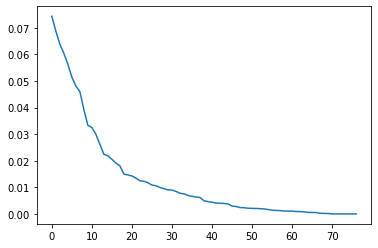

In [41]:
plt.plot(pca.explained_variance_ratio_)

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07437864, 0.14322074, 0.20715772, 0.26761675, 0.32399592,
       0.37548024, 0.42365881, 0.46970251, 0.50901936, 0.54235795,
       0.57488189, 0.604869  , 0.63110128, 0.6535454 , 0.67542437,
       0.69598004, 0.71513734, 0.73321425, 0.74822409, 0.76288297,
       0.7771641 , 0.79063496, 0.80311927, 0.81540055, 0.82715549,
       0.83802299, 0.8486144 , 0.85855432, 0.86804952, 0.87711767,
       0.88609061, 0.89456709, 0.90237544, 0.90991586, 0.9168873 ,
       0.92349913, 0.92985518, 0.93603108, 0.94099228, 0.945607  ,
       0.9500225 , 0.95412724, 0.95812483, 0.96206111, 0.96581239,
       0.96876338, 0.97155759, 0.97394683, 0.97628696, 0.9784219 ,
       0.98050576, 0.98255688, 0.98453048, 0.98639546, 0.98804992,
       0.98945638, 0.99076198, 0.99201563, 0.99309356, 0.99416337,
       0.99521674, 0.996128  , 0.99701419, 0.99778348, 0.99835792,
       0.99889821, 0.99942306, 0.99965117, 0.9998572 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

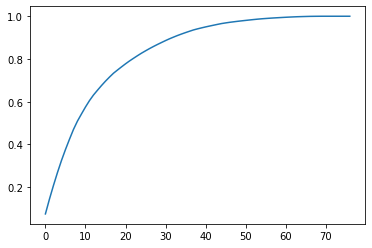

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [44]:
pca=PCA(n_components=56).fit(trainx)

In [45]:
cp=pca.transform(trainx)

In [46]:
cp=pd.DataFrame(cp)

In [47]:
cp.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.078743,-0.645118,-0.544514,-0.463572,-0.741667,0.298770,-0.100654,0.694754,-0.295424,0.153439,...,-0.041371,-0.052336,0.050159,0.009138,-0.008609,-0.021589,-0.038864,0.033088,0.078348,-0.136526
1,-0.438012,0.500475,0.435501,-0.036547,0.025637,-0.392447,1.027194,-0.637659,-0.188049,-0.176943,...,0.034660,-0.036210,0.057898,-0.013437,-0.089855,0.001371,0.002583,-0.001652,0.019338,-0.004531
2,-0.108745,-0.677513,-0.442907,-0.243902,-0.808657,0.334202,0.170956,0.556218,0.357830,0.047333,...,-0.005890,-0.083967,0.090191,0.032307,-0.014990,0.028679,-0.045189,0.015329,0.082162,-0.128302
3,-0.197478,-0.735571,-0.440229,-0.250047,0.090039,0.969802,-0.064741,-0.275353,0.175845,0.051999,...,0.092686,0.020643,-0.051816,-0.023131,-0.014840,0.013455,0.020762,0.008844,0.054952,-0.014915
4,1.212190,0.595958,0.315544,-0.059474,0.139862,-0.351551,-1.212153,0.810980,-0.258101,-0.073161,...,-0.009136,-0.013876,0.000317,-0.010452,0.000404,-0.047989,0.002140,-0.010075,0.001114,0.011852


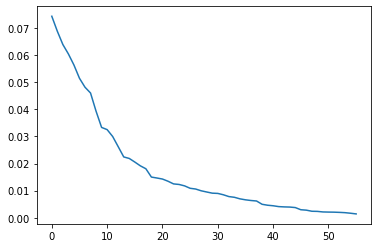

In [48]:
plt.plot(pca.explained_variance_ratio_)

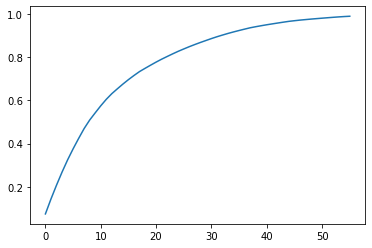

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [50]:
def regression(x,y):
    trainx,testx,trainy,test=train_test_split(x,y,test_size=0.2)
    linearreg= LinearRegression().fit(trainx,trainy)
    linearreg.predict(testx)
    linearrms=sqrt(mean_squared_error(testy,linearreg.predict(testx),squared=False))
    decisionreg = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
    decisionreg.predict(testx)
    decisionrms=sqrt(mean_squared_error(testy,decisionreg.predict(testx),squared=False))
    randomreg= RandomForestRegressor(max_depth=10, random_state=0).fit(trainx,trainy)
    randomreg.predict(testx)
    randomrms=sqrt(mean_squared_error(testy,randomreg.predict(testx),squared=False))
    adabreg = AdaBoostRegressor(random_state=0, n_estimators=100).fit(trainx,trainy)
    adabreg.predict(testx)
    adabrms=sqrt(mean_squared_error(testy,adabreg.predict(testx),squared=False))
    gradreg= GradientBoostingRegressor(random_state=0).fit(trainx,trainy)
    gradreg.predict(testx)
    gradrms=sqrt(mean_squared_error(testy,gradreg.predict(testx),squared=False))
    print("LinearRegression          = ",linearreg.score(testx,testy))
    print("Decision Tree Regressor   = ",decisionreg.score(testx,testy))
    print("RandomForestRegressor     = ",randomreg.score(testx,testy))
    print("AdaBoostRegressor         = ",adabreg.score(testx,testy))
    print("GradientBoostingRegressor = ",gradreg.score(testx,testy))
    
    print("LinearRegression          rms   = ",linearrms)
    print("Decision Tree Regressor   rms   = ",decisionrms)
    print("RandomForestRegressor     rms   = ",randomrms)
    print("AdaBoostRegressor         rms   = ",adabrms)
    print("GradientBoostingRegressor rms   = ",gradrms)



In [51]:
regression(df,y)

LinearRegression          =  -0.6429816846065324
Decision Tree Regressor   =  -0.7561813774569079
RandomForestRegressor     =  -0.6204222516590998
AdaBoostRegressor         =  -0.2558567705718515
GradientBoostingRegressor =  -0.5424199049543288
LinearRegression          rms   =  80.24832020623491
Decision Tree Regressor   rms   =  81.59623342657228
RandomForestRegressor     rms   =  79.9714221739825
AdaBoostRegressor         rms   =  75.03481180582945
GradientBoostingRegressor rms   =  78.99114790943905


In [52]:
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [64]:
finalmdl=decisionreg

In [65]:
import pickle
import io

In [66]:
file=open("finalmodel.pkl","wb")

In [67]:
pickle.dump(finalmdl,file)

In [68]:
file.close()

In [69]:
file=open("finalmodel.pkl","rb")

In [70]:
pickle.load(file)

DecisionTreeRegressor(random_state=0)

<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Document</title>
</head>

<body>

    <div style="color:blue">
        <form action="{{ url_for('predict')}}" method="post">
            <h2>black friday analysis</h2>
            <h3>Year</h3>
            <input id="first" name="Year" type="number ">
            <h3>gendre</h3><br><input id="second" name="Present_Price" required="required">
            <h3>age</h3><input id="third" name="Kms_Driven" required="required">
            <h3>How much owners previously had the car(0 or 1 or 3) ?</h3><br><input id="fourth" name="Owner" required="required">
	    
            <h3>What Is the Fuel type?</h3><br><select name="Fuel_Type_Petrol" id="fuel" required="required">
                <option value="Petrol">Petrol</option>
                <option value="Diesel">Diesel</option>
                <option value="Diesel">CNG</option>
            </select>
            <h3>Are you A Dealer or Individual</h3><br><select name="Seller_Type_Individual" id="resea" required="required">
                <option value="Dealer">Dealer</option>
                <option value="Individual">Individual</option>
            </select>
            <h3>Transmission type</h3><br><select name="Transmission_Mannual" id="research" required="required">
                <option value="Mannual">Manual Car</option>
                <option value="Automatic">Automatic Car</option>
            </select>
            <br><br><button id="sub" type="submit ">Calculate the Selling Price</button>
            <br>




        </form>



        <br><br><h3>{{ prediction_text }}<h3>
    </div>




    <style>
        body {
            background-color: lightslategray;
            text-align: center;
            padding: 0px;
        }
        
        #research {
            font-size: 18px;
            width: 100px;
            height: 23px;
            top: 23px;
        }
        
        #box {
            border-radius: 60px;
            border-color: 45px;
            border-style: solid;
            font-family: cursive;
            text-align: center;
            background-color: rgb(168, 131, 61);
            font-size: medium;
            position: absolute;
            width: 700px;
            bottom: 9%;
            height: 850px;
            right: 30%;
            padding: 0px;
            margin: 0px;
            font-size: 14px;
        }
        
        #fuel {
            width: 83px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 20px;
        }
        
        #fuel:hover {
            background-color: coral;
        }
        
        #research {
            width: 99px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }
        
        #research:hover {
            background-color: coral;
        }
        
        #resea {
            width: 99px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }
        
        #resea:hover {
            background-color: coral;
        }
        
        #sub {
            width: 120px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
        }
        
        #sub:hover {
            background-color: darkcyan;
        }
        
        #first {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
        
        #second {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
        
        #third {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
        
        #fourth {
            border-radius: 14px;
            height: 25px;
            font-size: 20px;
            text-align: center;
        }
    </style>
</body>

</html>